## week 9 Exercise Feature space

### Ex 1
Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'

### Download the data
- Programatically download the data from the above link.
- Import the data into a Pandas dataframe.
- Show the head of the Pandas dataframe.

In [2]:
import pandas as pd;
URL = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'
car_data_df = pd.read_csv(URL, delimiter=",")
car_data_df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


### Feature engineering
##### - Reduce the dataset by:
- Make == Honda
- Fueltype == Gasoline
- Remove outliers. Hint: df[column name'] < df['column name'].quantile(0.90)
- Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
- Normalize data (reduce values to be between 0 and 1)

In [3]:
# Make == honda:
print(car_data_df[car_data_df['Identification.Make'] == 'Honda'])

      Dimensions.Height  Dimensions.Length  Dimensions.Width  \
101                 152                240                57   
102                 152                240                57   
103                 152                240                57   
104                 152                240                57   
105                 152                240                57   
...                 ...                ...               ...   
5067                  3                253               201   
5068                  3                253               201   
5069                  3                253               201   
5070                  3                253               201   
5071                 13                253               201   

     Engine Information.Driveline           Engine Information.Engine Type  \
101             Front-wheel drive   Honda 3.5L 6 Cylinder 271hp 251 ft-lbs   
102             Front-wheel drive  Honda 2.4L 4 cylinder 190 hp 162 ft-lbs 

In [4]:
# Fueltype == Gasoline
print(car_data_df[car_data_df['Fuel Information.Fuel Type'] == 'Gasoline'])

      Dimensions.Height  Dimensions.Length  Dimensions.Width  \
0                   140                143               202   
1                   140                143               202   
2                   140                143               202   
3                   140                143               202   
4                   140                143               202   
...                 ...                ...               ...   
5071                 13                253               201   
5072                141                249               108   
5073                160                249               108   
5074                200                210               110   
5075                200                 94               110   

     Engine Information.Driveline  \
0                 All-wheel drive   
1               Front-wheel drive   
2               Front-wheel drive   
3                 All-wheel drive   
4                 All-wheel drive   
...      

In [19]:
# reduce Make og Fueltype together in a df boolean mask
make = 'Identification.Make'
fuel_type = 'Fuel Information.Fuel Type'
car_reduced_make_fuel_df = car_data_df[(car_data_df[make] == 'Honda') & (car_data_df[fuel_type] == 'Gasoline')]
quantile_value = 0.90

# - Remove outliers. Hint: df[column name'] < df['column name'].quantile(0.90)
# not sure about this one. Eg., what specific column names should we do it for?
highway = 'Fuel Information.Highway mpg'
horsepower = 'Engine Information.Engine Statistics.Horsepower'
# trying to use masking with highway and horsepower

no_outliers_df = car_reduced_make_fuel_df[(car_reduced_make_fuel_df[highway] < car_reduced_make_fuel_df[highway].quantile(quantile_value)) & 
                                          (car_reduced_make_fuel_df[horsepower] < car_reduced_make_fuel_df[horsepower].quantile(quantile_value))]
print(no_outliers_df)


      Dimensions.Height  Dimensions.Length  Dimensions.Width  \
102                 152                240                57   
103                 152                240                57   
104                 152                240                57   
106                 152                240                57   
107                 152                240                57   
...                 ...                ...               ...   
5067                  3                253               201   
5068                  3                253               201   
5069                  3                253               201   
5070                  3                253               201   
5071                 13                253               201   

     Engine Information.Driveline           Engine Information.Engine Type  \
102             Front-wheel drive  Honda 2.4L 4 cylinder 190 hp 162 ft-lbs   
103             Front-wheel drive  Honda 2.4L 4 cylinder 190 hp 162 ft-lbs 

In [6]:
# Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower':
#2d feature space
two_features = no_outliers_df[[horsepower, highway]]
print(two_features)

      Engine Information.Engine Statistics.Horsepower  \
102                                               190   
103                                               190   
104                                               190   
106                                               190   
107                                               190   
...                                               ...   
5067                                              250   
5068                                              250   
5069                                              250   
5070                                              250   
5071                                              250   

      Fuel Information.Highway mpg  
102                             31  
103                             31  
104                             31  
106                             31  
107                             31  
...                            ...  
5067                            25  
5068               

In [7]:
# Normalize data (reduce values to be between 0 and 1)
from sklearn import preprocessing
normalized = preprocessing.normalize(two_features)
#print(normalized)
print("******* In DataFrame ******* :")
# show in a dataframe, for better overview:
normalized = pd.DataFrame(normalized)
print(normalized)
# 0 is Engine Information.Engine Statistics.Horsepower	
# 1 is Fuel Information.Highway mpg

******* In DataFrame ******* :
            0         1
0    0.986950  0.161029
1    0.986950  0.161029
2    0.986950  0.161029
3    0.986950  0.161029
4    0.986950  0.161029
..        ...       ...
134  0.995037  0.099504
135  0.995424  0.095561
136  0.995037  0.099504
137  0.995424  0.095561
138  0.995037  0.099504

[139 rows x 2 columns]


### Linear regression
- Perform linear regression where x = horsepower and y = mpg
- What is the coefficient (slope) of your model? What does this number mean?
- According to your model, what is y when x=1.
- Show the regression line on a scatterplot with the other datapoints.

In [8]:
# Perform linear regression where x = horsepower and y = mpg (highway)
import sklearn.linear_model
import numpy as np

xs = two_features[horsepower]
ys = two_features[highway]

xs_reshape = np.array(xs).reshape(-1, 1)
model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, ys)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# What is the coefficient (slope) of your model? What does this number mean?
model.coef_
# Since it's negative, it means that the dependent variable tends to decrease over time, instead of increasing over time.

array([-0.07727343])

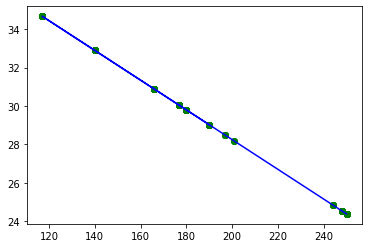

In [11]:
# - According to your model, what is y when x=1.
# Unsure about this one
import matplotlib.pyplot as plt

predicted = model.predict(xs_reshape)

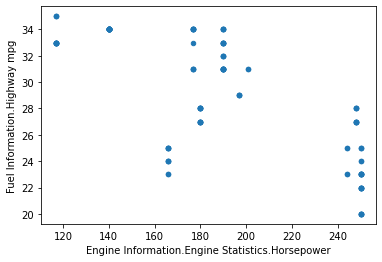

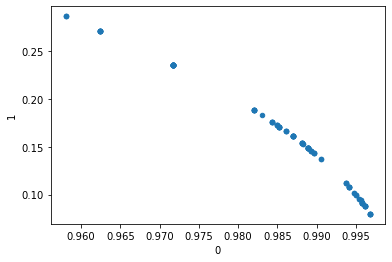

In [12]:
# Show the regression line on a scatterplot with the other datapoints.
two_features.plot.scatter(x=0, y=1)
# Now in a scatter plot with the normalized (0 to 1 values):
normalized.plot.scatter(x=0, y=1)


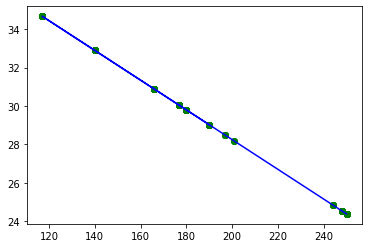

In [15]:
#Other way to get the first scatter, in a straight line:
plt.scatter(xs, predicted, color="green")
plt.plot(xs, predicted, color="blue")
plt.show()